 # First raw analysis 

In [1]:
%run 20_testing_different_bandwidths.ipynb

data_folder = ../Psychopy_data/pilot/B_theta_B_sf
Overwriting tmp/exp.py
]0;IPython: Notebooks/W17
 Initializing
B_thetas =  [0.09817477 1.11072073]
B_sfs =  [0.0625 0.25   1.    ]
Overwriting tmp/test.py


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
data_folder

'../Psychopy_data/pilot/B_theta_B_sf'

In [4]:

subj_name_list =  ['HL','JF25','AB','MP'] #changer et mettre le nom des nouveaux participants
subj_name_list =  ['LP',] #changer et mettre le nom des nouveaux participants

                
subj_data_list = []
import json
for subject in subj_name_list :
    x = json.load(open(os.path.join(data_folder, 'Psychophys_discrim_%s.json' % subject), 'rb'))
     #changer et mettre le path du fichier où se trouve les psychophysic data
    subj_data_list.append(x)

In [5]:

B_theta_list = []
for x in subj_data_list[0] :
    B_theta_list.append(x[3]*180/np.pi)
B_theta_list = sorted(set(B_theta_list))

print('B_theta_list=', B_theta_list)

B_sf_list = []
for x in subj_data_list[0] :
    B_sf_list.append(x[4])
B_sf_list = sorted(set(B_sf_list))
print('B_sf_list=', B_sf_list)


B_theta_list= [5.625, 10.316295486052553, 18.920169343208578, 34.69974357167867, 63.63961030678928]
B_sf_list= [0.0625, 0.125, 0.25, 0.5, 1.0]


### Theta/Btheta

In [6]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib.pyplot import cm

x_values = np.linspace(-45, 45, 400)
x_plot = np.reshape(x_values, (400,1))
lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1})

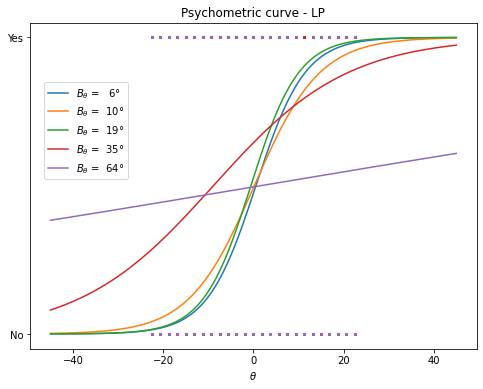

In [7]:

coef_list = []

for num, subj_data in enumerate(subj_data_list) :
    #color = iter(cm.Dark2(np.linspace(.5, 1,5)))
    plt.figure(figsize = (8,6)) 
    for ibtheta, b_theta in enumerate(B_theta_list):
        X = []
        y = []

        for item in subj_data :
            if item[3]*180/np.pi == b_theta :
                X.append(item[1]*180/np.pi)
                if item[2] == 'right':  
                    y.append(1)
                else:
                    y.append(0)
                
                
        X = np.asarray(X)
        X = X[:,np.newaxis]        
    
        lgs = LogisticRegression(**lr_kwargs)
        try :
            lgs.fit(X, y)
            coef_list.append((b_theta,lgs.coef_[0][0]))
        
            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_\theta$ = %3.f°' % b_theta)
            plt.scatter(X, y, s=4)
        except :
            pass
            
    plt.title('Psychometric curve - %s' % subj_name_list[num])
    plt.xlabel(r'$\theta$')
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.legend(loc = (0.03, 0.52)) 
    plt.show

### Theta/B_sf

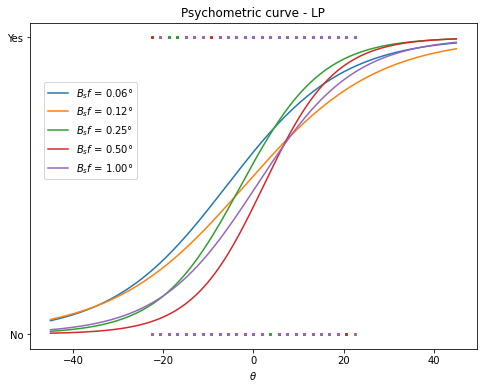

In [8]:
coef_list = []

for num, subj_data in enumerate(subj_data_list) :
    #color = iter(cm.Dark2(np.linspace(.5, 1,5)))
    plt.figure(figsize = (8,6)) 
    for iB_sf, B_sf in enumerate(B_sf_list):
        X = []
        y = []

        for i in subj_data :
            if i[4] == B_sf :
                X.append(i[1]*180/np.pi)
                if i[2] == 'right':  
                    y.append(1)
                else:
                    y.append(0)
                
                
        X = np.asarray(X)
        X = X[:,np.newaxis]
        #col = next(color)
        
    
        lgs = LogisticRegression(**lr_kwargs)
        try :
            lgs.fit(X, y)
            coef_list.append((B_sf,lgs.coef_[0][0]))
        
            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_sf$ = %3.2f°' % B_sf)
            plt.scatter(X, y, s=4)
        except :
            pass
            
    plt.title('Psychometric curve - %s' % subj_name_list[num])
    plt.xlabel(r'$\theta$')
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.legend(loc = (0.03, 0.52)) 
    plt.show

## B_sf/ B_theta

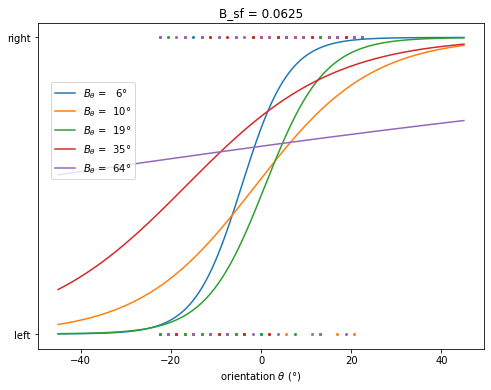

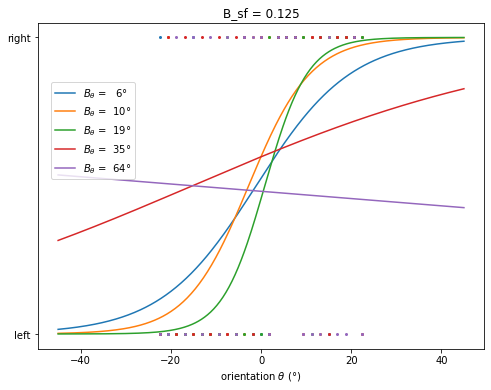

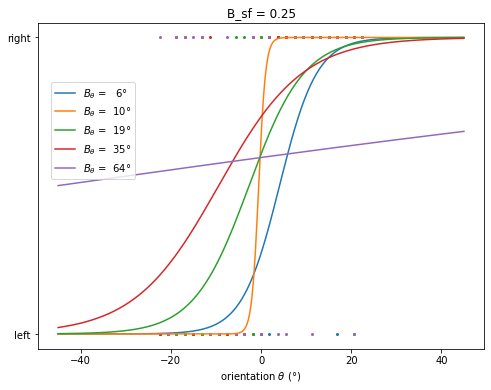

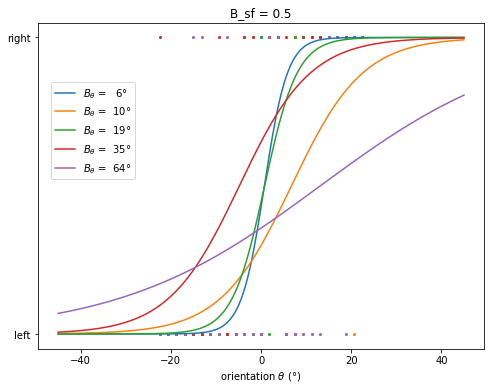

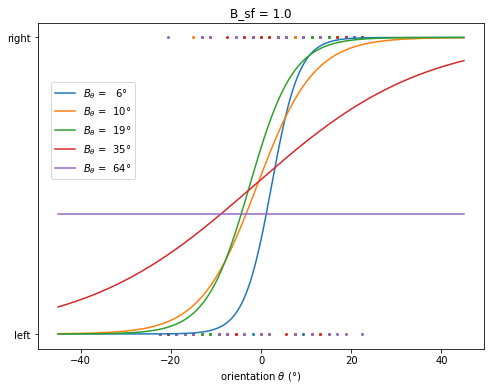

In [9]:
slopes = {}

for iB_sf, B_sf in enumerate(B_sf_list):
    slopes[B_sf] = {'B_thetas': [], 'slopes': []}
    plt.figure(figsize = (8,6)) 
    for ibtheta, B_theta in enumerate(B_theta_list):
        X = []
        y = []

        for i in subj_data :
            if i[3]*180/np.pi == B_theta and i[4] == B_sf:
                X.append(i[1]*180/np.pi)
                if i[2] == 'right':  
                    y.append(1)
                else:
                    y.append(0)


        X = np.asarray(X)
        X = X[:,np.newaxis]
        #col = next(color)


        lgs = LogisticRegression(**lr_kwargs)
        try :
            lgs.fit(X, y)
            slopes[B_sf]['B_thetas'].append(B_theta)
            slopes[B_sf]['slopes'].append(lgs.coef_[0][0])

            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_\theta$ = %3.f°' % B_theta)
            plt.scatter(X, y, s=4)
        except :
            pass

    plt.title('B_sf = %s' % B_sf)
    plt.xlabel(r'orientation $\theta$ (°)')
    plt.yticks([0.,1.],['left', 'right'])
    plt.legend(loc = (0.03, 0.52)) 
    plt.show()

In [10]:
slopes


{0.0625: {'B_thetas': [5.625,
   10.316295486052553,
   18.920169343208578,
   34.69974357167867,
   63.63961030678928],
  'slopes': [0.19112044863789046,
   0.07783516737964187,
   0.15251487809685266,
   0.06110462294583307,
   0.008843563466636303]},
 0.125: {'B_thetas': [5.625,
   10.316295486052553,
   18.920169343208578,
   34.69974357167867,
   63.63961030678928],
  'slopes': [0.09443513500667992,
   0.1450095747330176,
   0.21033204113146578,
   0.025997927047685224,
   -0.004932026198427894]},
 0.25: {'B_thetas': [5.625,
   10.316295486052553,
   18.920169343208578,
   34.69974357167867,
   63.63961030678928],
  'slopes': [0.24061380855478648,
   1.296387160169802,
   0.16341880617243174,
   0.10706348614377918,
   0.00852603133360345]},
 0.5: {'B_thetas': [5.625,
   10.316295486052553,
   18.920169343208578,
   34.69974357167867,
   63.63961030678928],
  'slopes': [0.3898863773494123,
   0.126419311017803,
   0.27631570123899685,
   0.1267418457032936,
   0.044636977117575805

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


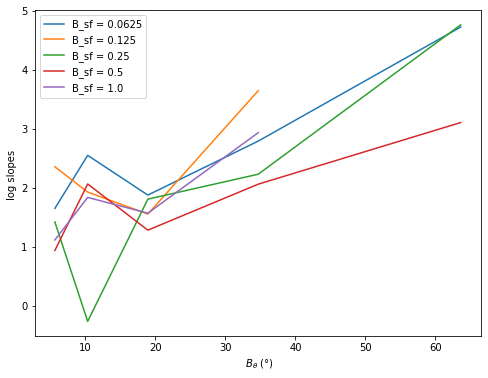

In [12]:
coef_list = []
plt.figure(figsize = (8,6)) 
for iB_sf, B_sf in enumerate(B_sf_list):
    plt.plot(slopes[B_sf]['B_thetas'], -np.log(slopes[B_sf]['slopes']), label='B_sf = %s' % B_sf)
plt.xlabel(r' $B_\theta$ (°)')
plt.ylabel(r'log slopes ')
plt.legend(loc ='best') 
plt.show()